Outline
1. Load Dataset
2. Prepare Data
3. Define Model
4. Evaluate Model

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score

## Load Dataset

In [2]:
# read data and 
def read_data(train, test):
    # read train and test data
    temp_train = pd.read_csv('mnist_train.csv')
    temp_test = pd.read_csv('mnist_test.csv')
    # make a copy of label
    train_label = temp_train['label']
    test_label = temp_test['label']
    # drop labels from train and test 
    train_data = temp_train.drop('label', axis = 1)
    test_data = temp_test.drop('label', axis = 1)
    
    return train_data, test_data, train_label, test_label

In [3]:
train_data, test_data, train_label, test_label = read_data('mnist_train.csv', 'mnist_test.scv')

In [4]:
train_data.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [5]:
# display a number 
def display(train_data, number):
    image = train_data.iloc[number]
    # convert to numpy array
    image = np.array(image, dtype = 'float')
    # 1*784 --> 28*28
    pixels = np.reshape(image, (28, 28))
    
    plt.imshow(pixels, cmap = plt.cm.binary)
    
    plot_image = plt.show
    
    return plot_image  

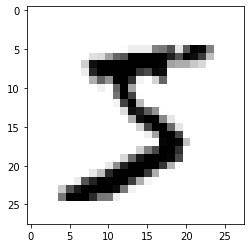

In [6]:
plot = display(train_data, 0)

In [7]:
train_label[0]

5

## Preprocessing

In [8]:
# normalize data(range [0,255] to [0,1])
def normalizing(train_data, test_data):
    train = np.array(train_data)
    test = np.array(test_data)
    
    float_train = train.astype('float64')
    float_test = test.astype('float64')
    # dividing by 255(255 is the maximum value)
    norm_train = train / 255.
    norm_test = test / 255.
    
    return norm_train, norm_test

In [9]:
norm_traindata, norm_testdata = normalizing(train_data, test_data)

In [10]:
norm_traindata

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
norm_traindata.shape

(60000, 784)

In [12]:
norm_testdata

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
norm_testdata.shape

(10000, 784)

In [14]:
# max and min values after data normalization
print(norm_traindata.max(), norm_traindata.min())

1.0 0.0


In [15]:
print(norm_testdata.max(), norm_testdata.min())

1.0 0.0


## Neural Network using sklearn

In [16]:
NN = MLPClassifier (hidden_layer_sizes = (392, 196))  #accuracy --> 0.9848

In [17]:
NN.fit(norm_traindata, train_label)

MLPClassifier(hidden_layer_sizes=(392, 196))

In [18]:
NN_predict = NN.predict(norm_testdata)

## Evaluate Model

In [19]:
# accuracy 
NN_accuracy = accuracy_score(test_label, NN_predict)

In [20]:
NN_accuracy

0.9848